   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2 

c:\Users\ngoct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ngoct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ngoct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

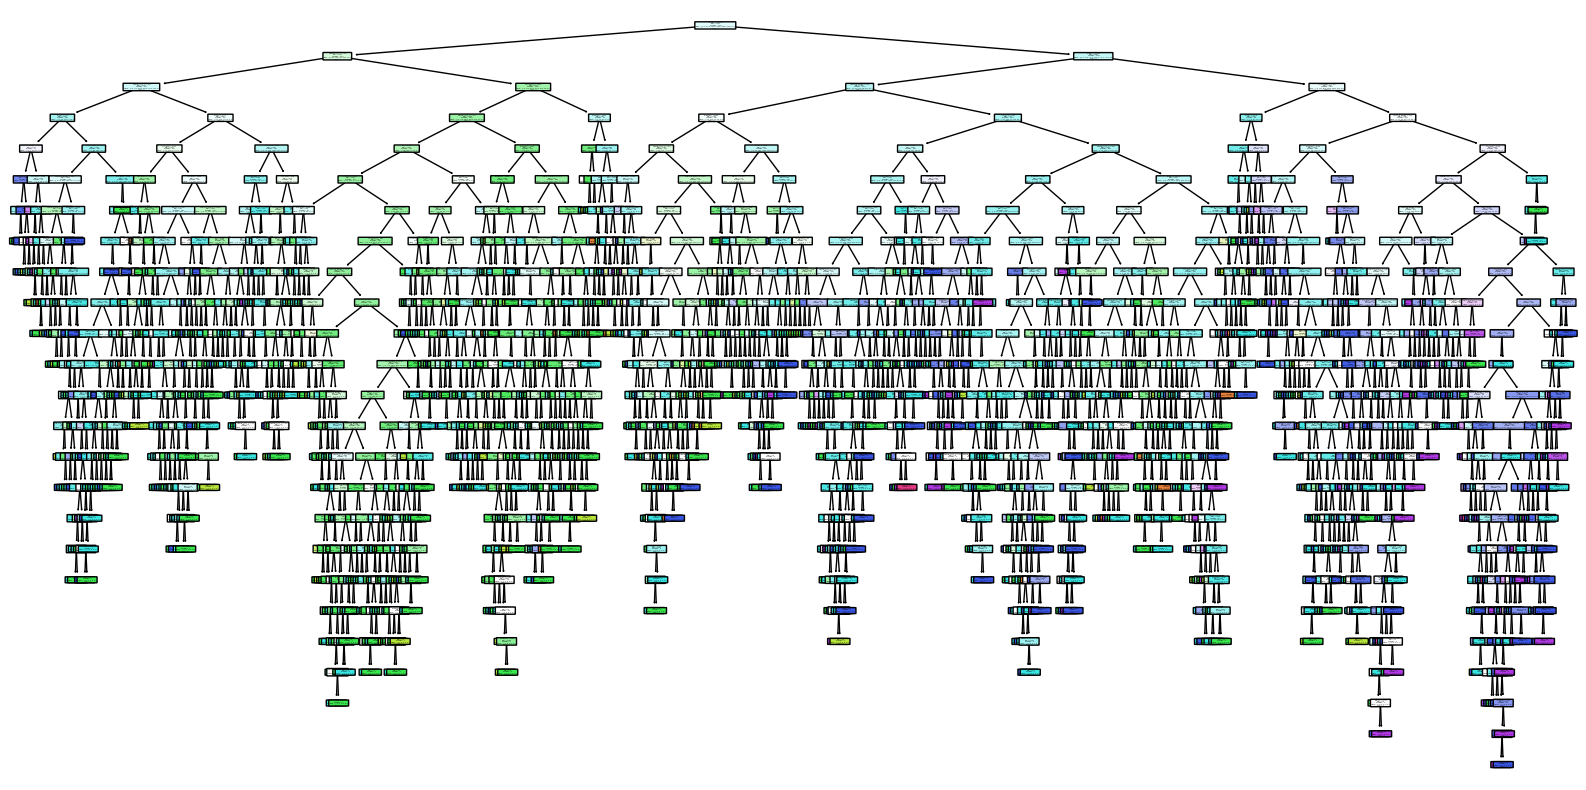

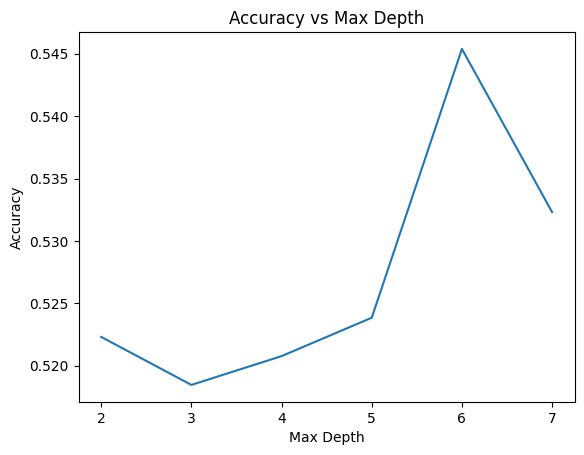

quality
Medium    4974
High      1277
Low        246
Name: count, dtype: int64
Classification Report (Grouped):
              precision    recall  f1-score   support

        High       0.62      0.64      0.63       256
         Low       0.25      0.24      0.25        49
      Medium       0.87      0.87      0.87       995

    accuracy                           0.80      1300
   macro avg       0.58      0.58      0.58      1300
weighted avg       0.80      0.80      0.80      1300

Confusion Matrix (Grouped):
[[164   0  92]
 [  3  12  34]
 [ 98  36 861]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu của red wine và white wine
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Thêm cột loại rượu (red/white) vào dataset
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Kết hợp cả hai dataset vào một dataset duy nhất
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Mã hóa cột 'type' thành số (0: red, 1: white)
le = LabelEncoder()
wine_data['type'] = le.fit_transform(wine_data['type'])

# Xem một số dòng đầu tiên của dữ liệu
print(wine_data.head())

# Chia dữ liệu thành features (X) và labels (y)
X = wine_data.drop('quality', axis=1)  # Các đặc trưng
y = wine_data['quality']  # Chất lượng rượu (nhãn)

# Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Kiểm tra kích thước của tập huấn luyện và kiểm tra
print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")

# Khởi tạo mô hình DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
dt.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt.predict(X_test)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Trực quan hóa cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], rounded=True)
plt.show()

# Kiểm tra độ chính xác của mô hình với các giá trị độ sâu khác nhau của cây quyết định
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Vẽ đồ thị đánh giá accuracy theo độ sâu của cây quyết định
plt.plot(depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

# Nhóm chất lượng rượu thành 3 loại: Low (0-4), Medium (5-6), High (7-10)
bins = [0, 4, 6, 10]
labels = ['Low', 'Medium', 'High']
y_grouped = pd.cut(y, bins=bins, labels=labels, right=True)

# Chia lại tập huấn luyện và kiểm tra cho nhóm chất lượng
X_train, X_test, y_train, y_test = train_test_split(X, y_grouped, test_size=0.2, random_state=42, stratify=y_grouped)

# Kiểm tra sự phân phối của các nhãn đã nhóm lại
print(y_grouped.value_counts())

# Huấn luyện lại mô hình Decision Tree với các nhóm chất lượng
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt.predict(X_test)

# Đánh giá mô hình với các nhóm chất lượng
print("Classification Report (Grouped):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (Grouped):")
print(confusion_matrix(y_test, y_pred))
